# Drawing UpSet Plots for m6A data

---

Author: Jianheng Liu @ Rui Zhang's Lab, SYSU, China

Email: jhfoxliu@gmail.com

Date: Feb, 2022

In [1]:
import pandas as pd
import numpy as np
import scipy.stats
import statsmodels.stats.multitest
import matplotlib as mpl
import matplotlib.pyplot as plt
import upsetplot
import matplotlib.ticker as ticker

# for Linux only, load font file
mpl.font_manager.fontManager.addfont("./arial.ttf")

# configure matplotlib
mpl.rcParams['font.family'] = 'Arial'
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['xtick.labelsize'] = 12
mpl.rcParams['ytick.labelsize'] = 12

In [2]:
def draw_upsetplot(df, Cluster_ids=None, tick_total=None, tick_intersect=None, intersection_fn=None, intersection_cutoff=50):
    df2 = df.copy()
    df2 = df2[df2["Cluster"].isin(Cluster_ids)]
    df2 = df2.set_index([i for i in df2.columns if i != "Cluster"])
    upset_obj = upsetplot.UpSet(df2, subset_size='count', intersection_plot_elements=3)
    if intersection_fn is not None:
        upset_obj.intersections.to_csv(intersection_fn)
    print(upset_obj.intersections)
    upset_obj.intersections = upset_obj.intersections[upset_obj.intersections>intersection_cutoff]
    upset = upset_obj.plot()
    
    if tick_total is not None:
        upset["totals"].xaxis.set_major_locator(ticker.MultipleLocator(tick_total))
    
    upset["intersections"].set_yscale("log")
    if tick_intersect is not None:
        upset["intersections"].set_yticks(tick_intersect)
    

In [3]:
df_clusters = pd.read_csv("m6A_methods.clustered.csv", index_col=0, header=0)

## 1. Analyze different methods

In [4]:
df_methods = df_clusters.copy()
df_methods["m6ACE-seq"] = df_methods[["m6ACE-seq_METTL3", "m6ACE-seq_METTL16", "m6ACE-seq_PCIF1", "m6ACE-seq_FTO_reg", "m6ACE-seq_FTO_OE", "m6ACE-seq_ALKBH5"]].any(axis=1)
df_methods["MAZTER-seq"] = df_methods[["MAZTER-seq_high", "MAZTER-seq_intermediate", "MAZTER-seq_low"]].any(axis=1)
df_methods = df_methods[["CIMS", "CITS", "m6ACE-seq", "m6A-label-seq", "MAZTER-seq", "m6A-REF-seq", "Cluster"]]

MAZTER-seq  m6ACE-seq  CITS   CIMS   m6A-label-seq  m6A-REF-seq
True        False      False  False  False          False          14133
False       True       False  False  False          False          10193
            False      True   False  False          False           6371
                       False  True   False          False           5291
                              False  True           False           6466
                                     False          True            3131
True        True       False  False  False          False            921
            False      True   False  False          False            623
False       True       True   False  False          False            901
True        False      False  True   False          False           1637
False       True       False  True   False          False            739
            False      True   True   False          False            495
True        False      False  False  True           False   

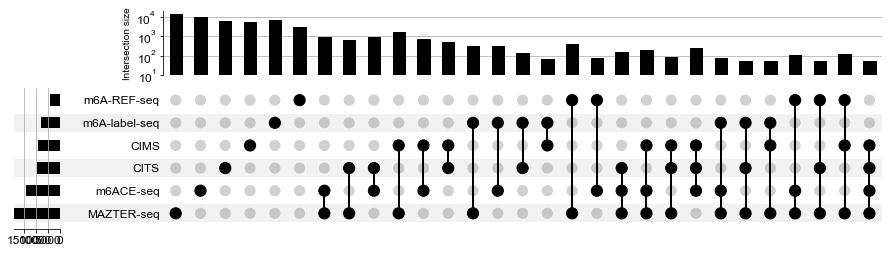

In [5]:
draw_upsetplot(df_methods, Cluster_ids=[1,2,3], tick_total=5000, tick_intersect=[10, 100, 1000, 10000], intersection_fn="m6A_methods_factors_cluster123_intersections.csv")
plt.savefig("m6A_methods.cluster123.upset.pdf")

m6ACE-seq  CITS   m6A-label-seq  CIMS   m6A-REF-seq  MAZTER-seq
True       False  False          False  False        False         4229
False      True   False          False  False        False         1421
           False  True           False  False        False         1503
                  False          True   False        False          132
                                 False  True         False           75
                                        False        True             6
True       True   False          False  False        False          209
           False  True           False  False        False            6
                  False          True   False        False            6
False      True   False          True   False        False            1
                                 False  False        True             7
           False  False          True   False        True            15
True       True   False          True   False        False            3


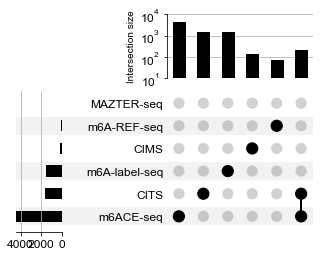

In [9]:
draw_upsetplot(df_methods, Cluster_ids=[4], tick_total=2000, tick_intersect=[10, 100, 1000, 10000], intersection_fn="m6A_methods_factors_cluster4_intersections.csv")
plt.savefig("m6A_methods.cluster4.upset.pdf")

## 2. Analyze m6ACE-seq

In [6]:
df_m6ACEseq = df_clusters.copy()
df_m6ACEseq = df_m6ACEseq[["m6ACE-seq_METTL3", "m6ACE-seq_METTL16", "m6ACE-seq_PCIF1", "m6ACE-seq_FTO_reg", "m6ACE-seq_FTO_OE", "m6ACE-seq_ALKBH5", "Cluster"]]
df_m6ACEseq.columns = ["METTL3", "METTL16", "PCIF1", "FTO", "FTO (OE)", "ALKBH5", "Cluster"]
df_m6ACEseq = df_m6ACEseq[df_m6ACEseq[["METTL3", "METTL16", "PCIF1", "FTO", "FTO (OE)", "ALKBH5"]].sum(axis=1)>0]

METTL3  PCIF1  METTL16  FTO (OE)  ALKBH5  FTO  
True    False  False    False     False   False    12552
False   True   False    False     False   False      626
        False  True     False     False   False       87
               False    True      False   False       44
                        False     True    False      214
                                  False   True        69
True    True   False    False     False   False      103
        False  True     False     False   False      207
False   True   True     False     False   False       29
True    False  False    True      False   False      124
False   True   False    True      False   False       22
        False  True     True      False   False        5
True    False  False    False     True    False       18
False   True   False    False     True    False        2
True    False  False    False     False   True        12
False   True   False    False     False   True         1
        False  False    False     True  

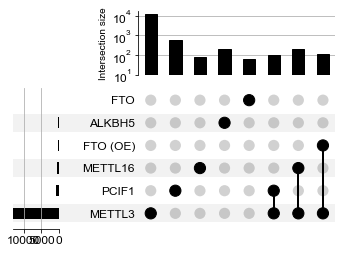

In [7]:
draw_upsetplot(df_m6ACEseq, Cluster_ids=[1,2,3], tick_total=5000, tick_intersect=[10, 100, 1000, 10000], intersection_fn="m6ACE_seq_factors_cluster123_intersections.csv")
plt.savefig("m6ACEseq_cluster123.upset.pdf")

PCIF1  METTL3  ALKBH5  METTL16  FTO    FTO (OE)
True   False   False   False    False  False       2719
False  True    False   False    False  False        968
       False   True    False    False  False        335
               False   True     False  False         30
                       False    True   False        115
                                False  True          12
True   True    False   False    False  False         29
       False   True    False    False  False         26
False  True    True    False    False  False          1
True   False   False   True     False  False         99
False  True    False   True     False  False         16
True   False   False   False    True   False          5
False  True    False   False    True   False          1
       False   True    False    True   False          7
True   False   False   False    False  True          62
False  True    False   False    False  True           6
       False   False   True     False  True           1


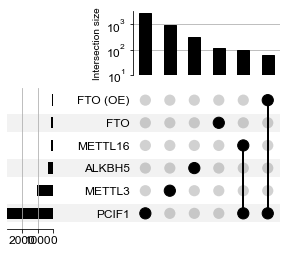

In [8]:
draw_upsetplot(df_m6ACEseq, Cluster_ids=[4], tick_total=1000, tick_intersect=[10, 100, 1000], intersection_fn="m6ACE_seq_factors_cluster4_intersections.csv")
plt.savefig("m6ACEseq_cluster4.upset.pdf")